
# Real Super store analysis:
## product analysis and customer segmentation







### Overview:

This is a transactional dataset which contains all the transactions occuring between 2016-01-01 and 2019-12-31 for Canada based real super store.

This dataset has 27 columns,'Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Number of days','Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State','Country', 'Region', 'Product ID', 'Category', 'Sub-Category','Product Name', 'Sales', 'Quantity', 'Unit Sales', 'Discount', 'Profit','Shipping Cost', 'Order Priority', 'Unit shipping cost',       'Profit_per_unit', 'unit cost' and 51292 rows.


### Goals:

- I try to find which facts can affect the company's revenue and profits by doing products analysis and customer analysis.
- Furtherly, I try to segment customers based on cohort analysis, RFM and K-Means segmentation, so the company can target its customers efficiently.

### content:

#### 1.Exploring and cleaning Data

- To get an overview of my data, to check if any null values and duplicated rows, to check the shape of dataset and statistical information and data structures.


#### 2. Product Analysis

- Which state and city has the toppest sales?

    
- Which are the top 5 profit-making products?


- What is the average delivery time? Does dilivery time and cost affect total sales?


- How is the product sales varying with discounts?


#### 3. Time series analysis and cohort analysis

##### Time Series Analysis

- Are profits and revenue increase over time?

- Does customers' purchasing affected by days of week?

- Does seasom affect revenue?

##### Cohort analysis

- Calculate and visualize retention rates


#### 4. Customer segmentation

##### RFM segmentation

- Behavioral customer segmentation based on 3 metrics: Recency(R), Frequency(F), Monetary Value(M).

- Sort customers based on these metrics.

- Break customers into a pre-defined number of groups 

- Assign a label to each group

##### K-Means segmentation


- skewed varibales.

- Standardize to the same average values.

- Scale to the same standard deviation

- Elbow criterion

- Visualize relative importance of segment attributes


#### 5. Conclusions of customer segmentation:

##### RFM segmentation

- Assign customers new segments based on the calculate of RFM scores: Gold, Silver, Bronze.

- Gold: they are the best customers,lowest recency and highest frequency and monetary value.
- Silver: they are in the medium.
- Bronze: their performances are not so good, highest recency and lowest frequency and monetary value.


##### K-Means segmentation

- Assign customers new segments based on the calculate of RFM scores: Active, Lapsed, Inactive,Churned.

- Active:they are the best customers,lowest recency and highest frequency and monetary value.
- Lapsed:their performances are better.
- Inactive:they are in the medium.
- Churned:their performances are not so good, highest recency and lowest frequency and monetary value.
____

#### reference: 

- Customer Segmentation in Python by Karolis Urbonas
- https://campus.datacamp.com/courses/customer-segmentation-in-python



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# download dataset
store_df = pd.read_csv('SuperstoreDataset.csv', encoding = 'latin1')

### 1. Exploring and cleaning Data

To get an overview of my data, to check if any null values and duplicated rows, to check the shape of dataset and statistical information and data structures.

In [3]:
# to get an overview of data
store_df.head()

,Row ID,Order ID,Order Date,Ship Date,Number of days,Ship Mode,Customer ID,Customer Name,Segment,City,...,Sales,Quantity,Unit Sales,Discount,Profit,Shipping Cost,Order Priority,Unit shipping cost,Profit_per_unit,unit cost
0,6147.0,MX-2012-134460,5/22/2017,5/26/2017,4.0,Second Class,MC-18100,Mick Crebagga,Consumer,Dartmouth,...,61.380,3.0,20.460,0.0,1.800,0.00,High,0.0,0.600,19.86
1,9596.0,MX-2012-140767,2/18/2017,2/22/2017,4.0,Standard Class,RB-19795,Ross Baird,Home Office,Saskatoon,...,13.440,2.0,6.720,0.0,2.400,0.00,Medium,0.0,1.200,5.52
2,24175.0,IN-2014-57662,8/5/2019,8/10/2019,5.0,Standard Class,DB-13270,Deborah Brumfield,Home Office,Red Deer,...,58.050,5.0,11.610,0.1,19.950,0.01,Medium,0.0,3.990,7.62
3,29002.0,IN-2014-62366,6/19/2019,6/19/2019,0.0,Same Day,KE-16420,Katrina Edelman,Corporate,Kingston,...,65.100,5.0,13.020,0.0,4.500,0.01,Medium,0.0,0.900,12.12
4,46582.0,TU-2014-6730,11/29/2019,11/30/2019,1.0,First Class,KF-6285,Karen Ferguson,Home Office,Red Deer,...,34.128,6.0,5.688,0.6,-49.572,0.02,Medium,0.0,-8.262,13.95


In [4]:
# check if any null value each columns
store_df.isnull().sum()

Row ID                2
Order ID              2
Order Date            2
Ship Date             2
Number of days        2
Ship Mode             2
Customer ID           2
Customer Name         2
Segment               2
City                  2
State                 2
Country               2
Region                2
Product ID            2
Category              2
Sub-Category          2
Product Name          2
Sales                 2
Quantity              2
Unit Sales            2
Discount              2
Profit                2
Shipping Cost         2
Order Priority        2
Unit shipping cost    2
Profit_per_unit       2
unit cost             2
dtype: int64

In [5]:
#drop null values
store_df = store_df.dropna()

In [6]:
# check if I have dropped all null values, and data structure in each columns
store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 27 columns):
Row ID                51290 non-null float64
Order ID              51290 non-null object
Order Date            51290 non-null object
Ship Date             51290 non-null object
Number of days        51290 non-null float64
Ship Mode             51290 non-null object
Customer ID           51290 non-null object
Customer Name         51290 non-null object
Segment               51290 non-null object
City                  51290 non-null object
State                 51290 non-null object
Country               51290 non-null object
Region                51290 non-null object
Product ID            51290 non-null object
Category              51290 non-null object
Sub-Category          51290 non-null object
Product Name          51290 non-null object
Sales                 51290 non-null float64
Quantity              51290 non-null float64
Unit Sales            51290 non-null float64
Discou

In [7]:
# drop duplicated rows
store_df.drop_duplicates().tail(5)

,Row ID,Order ID,Order Date,Ship Date,Number of days,Ship Mode,Customer ID,Customer Name,Segment,City,...,Sales,Quantity,Unit Sales,Discount,Profit,Shipping Cost,Order Priority,Unit shipping cost,Profit_per_unit,unit cost
51285,42617.0,IR-2011-7220,3/11/2016,3/13/2016,2.0,Second Class,PM-9135,Peter McVee,Home Office,St. John's,...,642.690,1.0,642.690,0.0,244.200,285.83,Critical,285.83,244.200,112.66
51286,29601.0,IN-2012-48240,5/25/2017,5/28/2017,3.0,Second Class,GP-14740,Guy Phonely,Corporate,St. John's,...,1745.340,2.0,872.670,0.0,226.860,616.27,Critical,308.14,113.430,451.11
51287,48022.0,UP-2011-5440,6/3/2016,6/5/2016,2.0,First Class,CC-2550,Clay Cheatham,Consumer,Guelph,...,855.150,1.0,855.150,0.0,384.810,325.04,Critical,325.04,384.810,145.3
51288,30191.0,IN-2011-10286,12/17/2016,12/20/2016,3.0,First Class,PB-19210,Phillip Breyer,Corporate,Dartmouth,...,1715.160,2.0,857.580,0.0,720.360,725.57,Critical,362.79,360.180,134.62
51289,33536.0,CA-2013-146633,11/16/2018,11/18/2018,2.0,Second Class,TG-21310,Toby Gnade,Consumer,Surrey,...,1016.792,1.0,1016.792,0.2,381.297,363.87,Critical,363.87,381.297,271.63


In [8]:
#shape of dataset
store_df.shape

(51290, 27)

In [9]:
#check statistical information of data
store_df.describe()

,Row ID,Number of days,Sales,Quantity,Unit Sales,Discount,Profit,Shipping Cost,Unit shipping cost,Profit_per_unit
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,3.969331,246.490581,3.476545,71.657487,0.142908,28.610982,26.375915,7.777773,8.122688
std,14806.29199,1.729447,487.565361,2.278766,113.581515,0.212280,174.340972,57.296804,14.755059,43.338665
min,1.00000,0.000000,0.444000,1.000000,0.336000,0.000000,-6599.978000,0.000000,0.000000,-1319.995600
25%,12823.25000,3.000000,30.758625,2.000000,11.799900,0.000000,0.000000,2.610000,1.000000,0.000000
50%,25645.50000,4.000000,85.053000,3.000000,29.400000,0.000000,9.240000,7.790000,2.740000,3.390000
75%,38467.75000,5.000000,251.053200,5.000000,82.160000,0.200000,36.810000,24.450000,7.960000,12.240000
max,51290.00000,8.000000,22638.480000,14.000000,3773.080000,0.850000,8399.976000,933.570000,363.870000,1679.995200


### 2. Product Analysis


    
• Which state and city has the toppest sales?
    
• Which are the top 5 profit-making products?

• What is the average delivery time? Does dilivery time and cost affect total sales?

• How is the product sales varying with discounts?



![jupyter](graphs/map_salesByStates.png)

In [10]:
# total sales and profits by states
df_state = store_df.groupby(['State'])[['Sales','Profit']].sum()
df_state

,Sales,Profit
State,,
Alberta,1.615654e+06,190282.99672
British Columbia,1.583367e+06,185361.30840
Manitoba,1.542952e+06,179553.16104
Newfoundland,1.518497e+06,188154.09478
Nova Scotia,1.545951e+06,193843.39990
Ontario,1.584295e+06,174178.75364
Quebec,1.654269e+06,185707.53610
Saskatchewan,1.597517e+06,170376.04070


In [11]:
# plot the sales by states
df_state = pd.DataFrame(df_state)
df_state_s = df_state.sort_values('Sales', ascending=False)
df_state_s['State'] = df_state_s.index

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

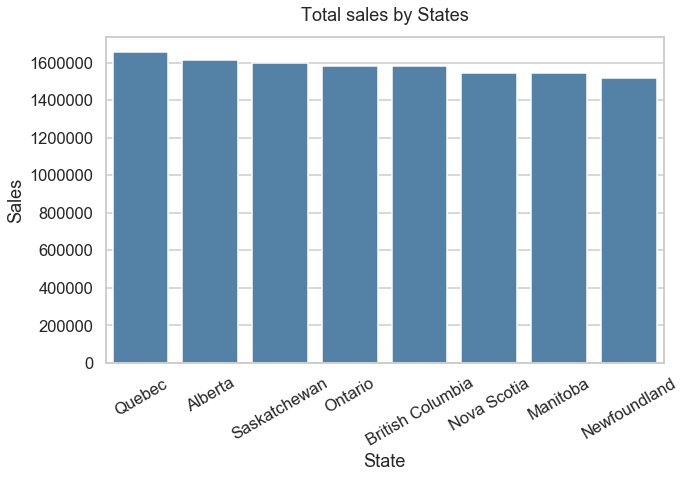

In [12]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10, 6))

fig_s1 = sns.barplot(y = 'Sales', x = 'State', data = df_state_s, color='steelblue')
fig_s1.set_title('Total sales by States', y=1.03)
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

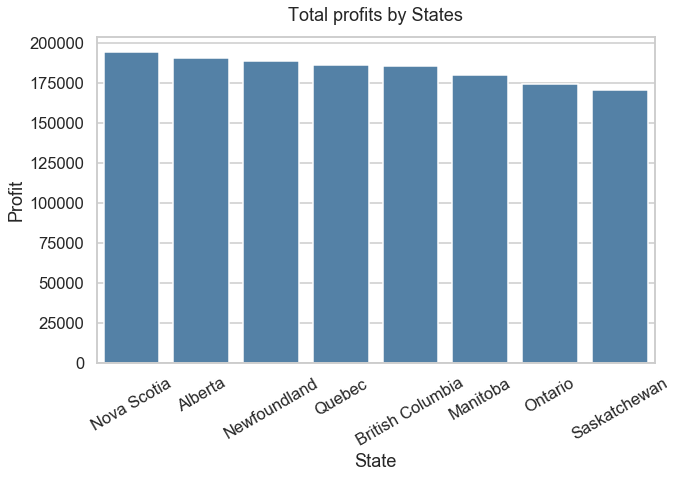

In [13]:
# plot the profits by states
df_state_p = df_state.sort_values('Profit', ascending=False)
df_state_p['State'] = df_state_p.index

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10, 6))

fig_s2 = sns.barplot(y = 'Profit', x = 'State', data = df_state_p, color='steelblue')
fig_s2.set_title('Total profits by States', y=1.03)
plt.xticks(rotation=30)

In [14]:
# total sales and profits by cities
df_city = store_df.groupby(['City'])[['Sales','Profit']].sum()
df_city

,Sales,Profit
City,,
Abbotsford,2.423779e+05,24436.49638
Barrie,7.472423e+04,9282.13564
Brampton,7.652445e+04,9566.58874
Brantford,8.491185e+04,12249.49954
Burlington,7.739154e+04,12277.90604
Burnaby,2.539146e+05,24258.68318
Calgary,5.297380e+05,55941.81114
Coquitlam,2.180470e+05,33423.42200
Dartmouth,7.662057e+05,97374.13818


Text(0.5, 1.03, 'Total sales by City')

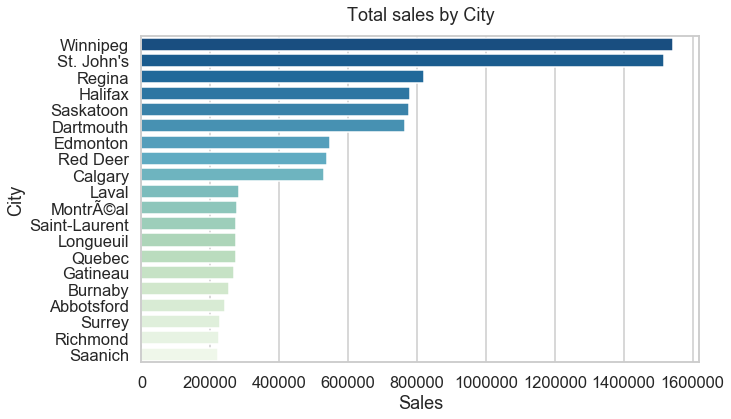

In [15]:
# plot the sales by cities
df_city = pd.DataFrame(df_city)
df_city['City'] = df_city.index
df_city_s = df_city.sort_values('Sales', ascending=False)


sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10, 6))

fig_c1 = sns.barplot(x = 'Sales', y = 'City', data = df_city_s[:20], palette=sns.color_palette('GnBu_r',20))
fig_c1.set_title('Total sales by City', y=1.03)

Text(0.5, 1.03, 'Total paofit by City')

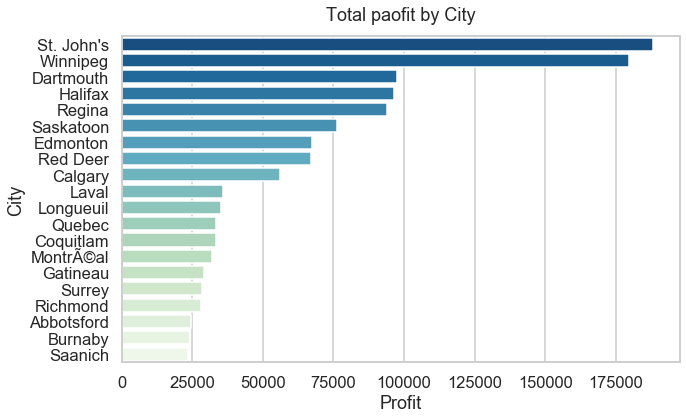

In [16]:
# plot the profits by cities
df_city = pd.DataFrame(df_city)
df_city['City'] = df_city.index
df_city_p = df_city.sort_values('Profit', ascending=False)


sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10, 6))

fig_c1 = sns.barplot(x = 'Profit', y = 'City', data = df_city_p[:20], palette=sns.color_palette('GnBu_r',20))
fig_c1.set_title('Total paofit by City', y=1.03)

In [17]:
# total sales and profits by categories
df_category = store_df.groupby(['Category'])[['Sales','Profit']].sum()
df_category

,Sales,Profit
Category,,
Furniture,4.110874e+06,285204.72380
Office Supplies,3.787070e+06,518473.83430
Technology,4.744557e+06,663778.73318


Text(0.5, 1.0, 'Profit distribution by category')

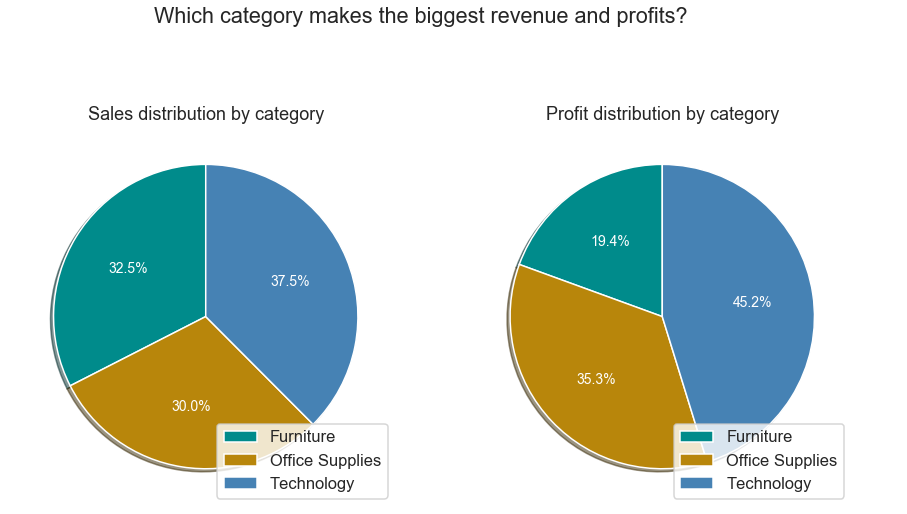

In [18]:
# plot the sales and profits by category

df_city = pd.DataFrame(df_city)
df_category['Category'] = df_category.index

fig_c = plt.figure(figsize=(15,9))
fig_c.suptitle('Which category makes the biggest revenue and profits?')
colors = ['darkcyan','darkgoldenrod','steelblue']

ax_c1 = fig_c.add_subplot(121)
plt.pie(df_category['Sales'], labels=df_category['Category'],autopct='%1.1f%%',colors=colors,shadow= True, startangle=90, 
        textprops={'fontsize':14, 'color':'w'})
plt.legend(loc='lower right')
ax_c1.set_title('Sales distribution by category')

ax_c2 = fig_c.add_subplot(122)
plt.pie(df_category['Profit'],labels=df_category['Category'],autopct='%1.1f%%',colors=colors, shadow= True, startangle=90,
       textprops={'fontsize':14, 'color':'w'})
plt.legend(loc='lower right')
ax_c2.set_title('Profit distribution by category')

In [19]:
# total sales and profits by sub-categories
df_sub_category = store_df.groupby('Sub-Category')[['Sales','Profit']].count()
df_sub_category

,Sales,Profit
Sub-Category,,
Accessories,3075,3075
Appliances,1755,1755
Art,4883,4883
Binders,6152,6152
Bookcases,2411,2411
Chairs,3434,3434
Copiers,2223,2223
Envelopes,2435,2435
Fasteners,2420,2420


Text(0.5, 1.05, 'Which sub-category makes the biggest profits?')

<Figure size 720x432 with 0 Axes>

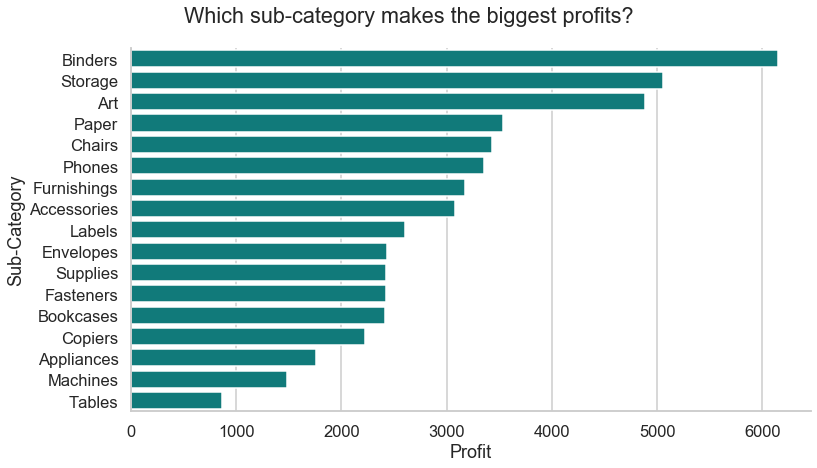

In [20]:
#plot the total sales and profits by sub-categories
#df_sub_category = pd.DataFrame(df_sub_category)

df_sub_category['Sub-Category'] = df_sub_category.index
df_sub_category = df_sub_category.sort_values('Profit', ascending=False)

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10, 6))

fig_c2 = sns.catplot(y='Sub-Category', x='Profit', data=df_sub_category, kind='bar', color='darkcyan', 
                     height=6.27, aspect=11.7/6.27)
fig_c2.fig.suptitle('Which sub-category makes the biggest profits?', y=1.05)

In [21]:
# total sales, profits and frequency by products
df_product = store_df.groupby('Product Name')[['Order ID','Profit']].agg({'Order ID':'count','Profit':'sum'})

In [22]:
#which products are most purchased
df_product_o = df_product.sort_values('Order ID', ascending=False)[:10]
df_product_o

,Order ID,Profit
Product Name,,
Staples,227,2611.0694
"Cardinal Index Tab, Clear",92,556.3702
"Eldon File Cart, Single Width",90,4238.8887
"Rogers File Cart, Single Width",84,2394.8953
"Ibico Index Tab, Clear",83,125.6411
"Sanford Pencil Sharpener, Water Color",80,601.9441
"Smead File Cart, Single Width",77,-237.6692
"Stanley Pencil Sharpener, Water Color",75,125.5390
"Acco Index Tab, Clear",75,309.1154


C:\Users\vivil\Anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


Text(0.5, 1.05, 'Which products are most purchased?')

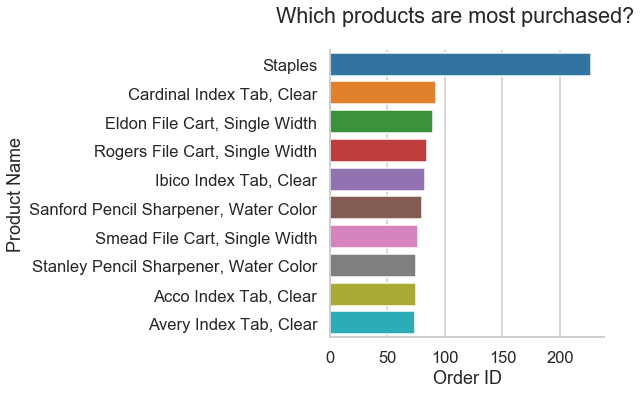

In [23]:
# plot most purchased product

df_product_o['Product Name'] = df_product_o.index

fig_o = sns.catplot(y='Product Name', x= 'Order ID', data=df_product_o, kind='bar')
fig_o.fig.suptitle('Which products are most purchased?', y=1.05)

In [24]:
#which product makes most profits
df_product_p = df_product.sort_values('Profit', ascending=False)[:10]
df_product_p

,Order ID,Profit
Product Name,,
Canon imageCLASS 2200 Advanced Copier,5,25199.9280
"Cisco Smart Phone, Full Size",38,17238.5206
"Motorola Smart Phone, Full Size",38,17027.1130
"Hoover Stove, Red",15,11807.9690
"Sauder Classic Bookcase, Traditional",29,10672.0730
"Harbour Creations Executive Leather Armchair, Adjustable",39,10427.3260
"Nokia Smart Phone, Full Size",47,9938.1955
"Cisco Smart Phone, with Caller ID",27,9786.6408
"Nokia Smart Phone, with Caller ID",24,9465.3257


C:\Users\vivil\Anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


Text(0.5, 1.05, 'which product makes most profits?')

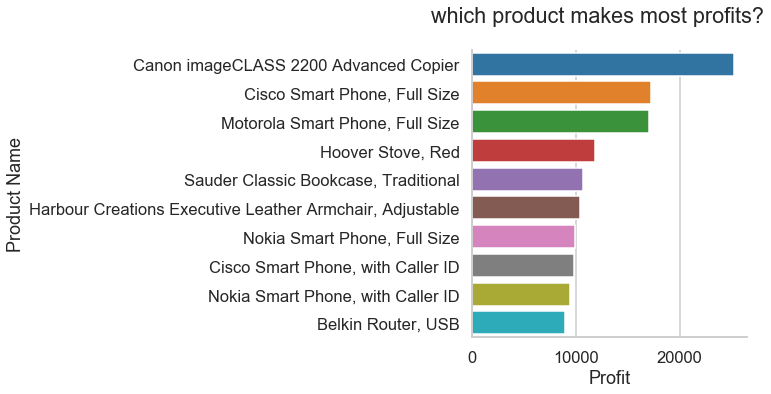

In [25]:
#plot the most profits products
df_product_p['Product Name'] = df_product_p.index

fig_p = sns.catplot(y='Product Name', x='Profit', data=df_product_p, kind='bar')
fig_p.fig.suptitle('which product makes most profits?', y=1.05)

In [26]:
#which product segment was bought most
df_segment = store_df.groupby('Segment')[['Order ID','Profit']].agg({'Order ID':'count','Profit':'sum'})
df_segment

,Order ID,Profit
Segment,,
Consumer,26518,749239.78206
Corporate,15429,441208.32866
Home Office,9343,277009.18056


Text(0.5, 1.0, 'Profit distribution by segment')

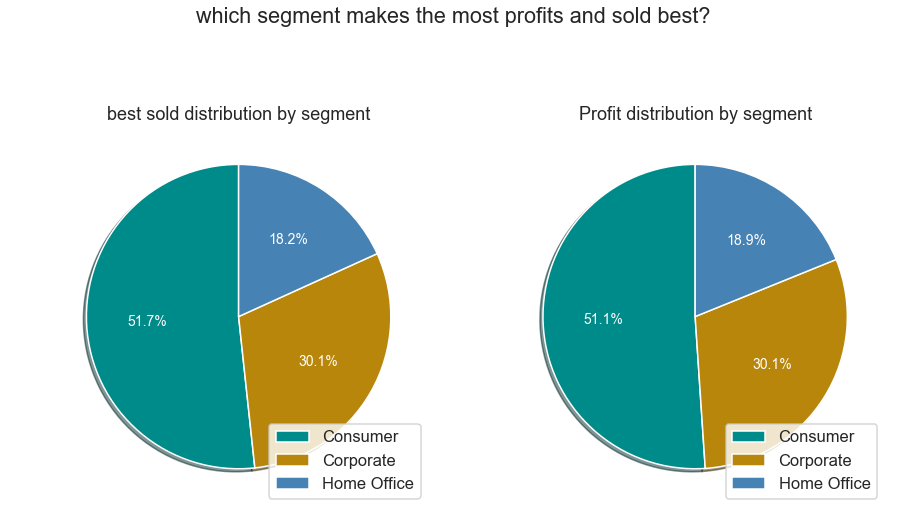

In [27]:
#plot which product segment was bought most

df_segment['Segment'] = df_segment.index

fig_s = plt.figure(figsize=(15,9))
fig_s.suptitle('which segment makes the most profits and sold best?')
colors = ['darkcyan','darkgoldenrod','steelblue']

ax_s1 = fig_s.add_subplot(121)
plt.pie(df_segment['Order ID'], labels=df_segment['Segment'],autopct='%1.1f%%',colors=colors,shadow= True, startangle=90, 
        textprops={'fontsize':14, 'color':'w'})
plt.legend(loc='lower right')
ax_s1.set_title('best sold distribution by segment')

ax_s2 = fig_s.add_subplot(122)
plt.pie(df_segment['Profit'],labels=df_segment['Segment'],autopct='%1.1f%%',colors=colors, shadow= True, startangle=90,
       textprops={'fontsize':14, 'color':'w'})
plt.legend(loc='lower right')
ax_s2.set_title('Profit distribution by segment')

In [28]:
# how many kinds of delivery 
store_df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'Same Day', 'First Class'],
      dtype=object)

Text(0.5, 1.03, 'dilivery time distribution')

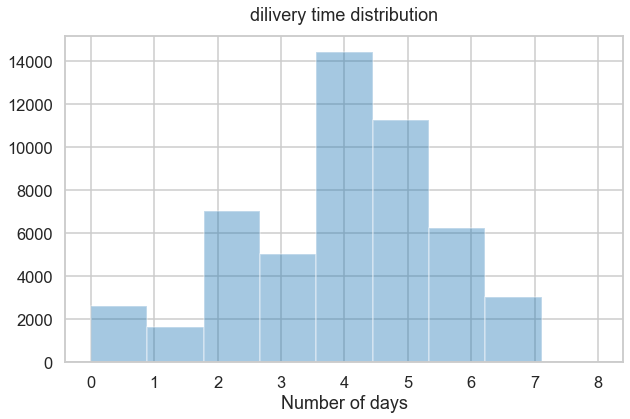

In [29]:
# plot the distribution delivery time
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10, 6))

fig_day = sns.distplot(store_df['Number of days'], kde= False, bins=9)
fig_day.set_title('dilivery time distribution', y=1.03)

In [30]:
# the average of delivery time
store_df['Number of days'].mean()

3.9693312536556835

In [31]:
# does dilivery time affect total sales?
df_day = store_df.groupby('Number of days')[['Order ID','Sales']].agg({'Order ID':'count','Sales':'sum'})
df_day

,Order ID,Sales
Number of days,,
0.0,2600,6.476187e+05
1.0,1662,4.151543e+05
2.0,7027,1.798425e+06
3.0,5035,1.205725e+06
4.0,14428,3.592320e+06
5.0,11232,2.701153e+06
6.0,6251,1.502342e+06
7.0,3052,7.790630e+05
8.0,3,7.000320e+02


Text(0.5, 1.03, 'Does delivery affact total sales?')

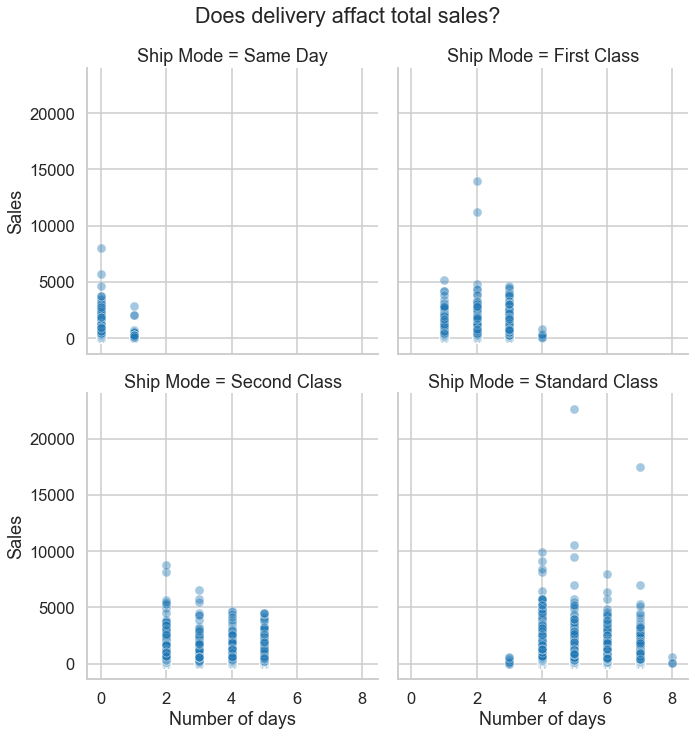

In [32]:
# plot: does dilivery time affect total sales?
fig_ship = sns.relplot(x='Number of days', y='Sales', data=store_df, kind='scatter', col='Ship Mode', col_wrap=2,
           col_order=['Same Day','First Class','Second Class','Standard Class'], alpha=0.4)
fig_ship.fig.suptitle('Does delivery affact total sales?', y=1.03)

(0, 10000)

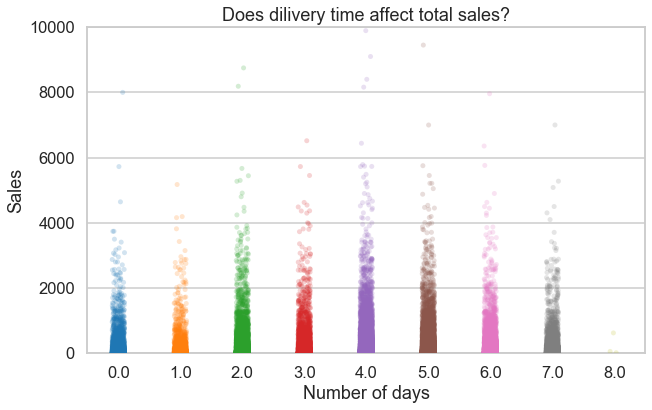

In [33]:
# plot: does dilivery time affect total sales?
plt.figure(figsize=(10,6))
fig_ship2 = sns.stripplot(x='Number of days', y='Sales', data=store_df, jitter=True, alpha=0.2)
plt.title('Does dilivery time affect total sales?')
plt.ylim([0,10000])

(0, 8000)

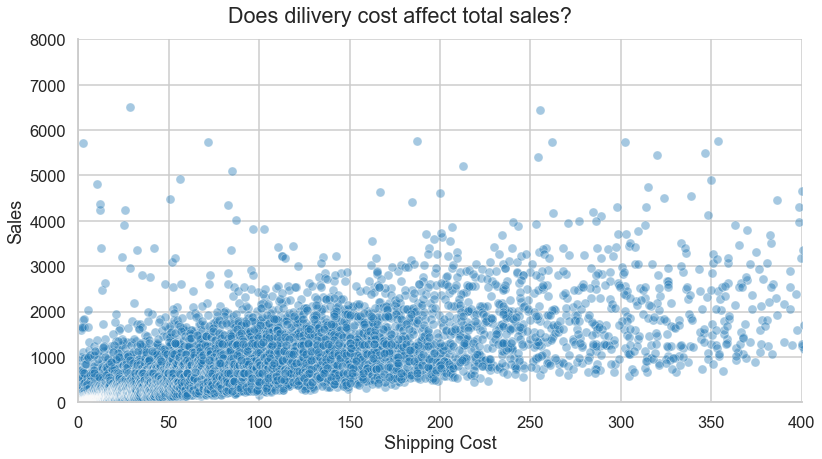

In [34]:
# plot: does dilivery cost affect total sales?
fig_ship3 = sns.relplot(x='Shipping Cost', y='Sales', data=store_df, kind='scatter', alpha=0.4, 
                       height=6.27, aspect=11.7/6.27)
fig_ship3.fig.suptitle('Does dilivery cost affect total sales?', y=1.03)
plt.xlim((0,400))
plt.ylim((0,8000))

Text(0.5, 1.03, 'Does discount affact sales')

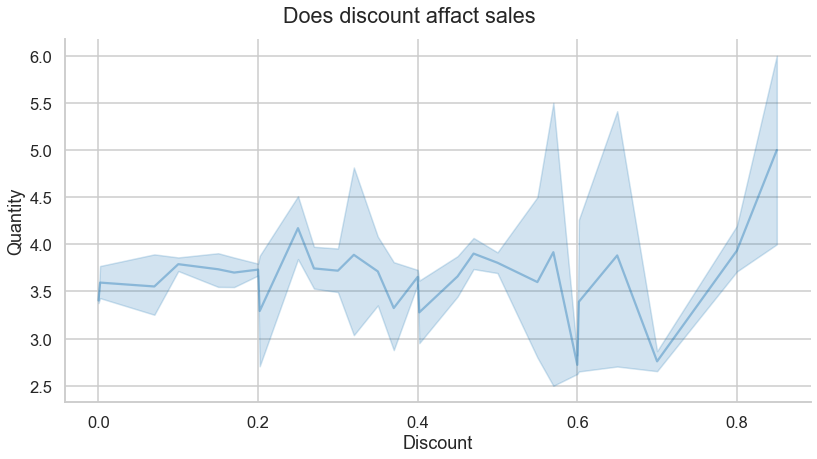

In [35]:
#relationship between discount and sales

fig_discount = sns.relplot(x='Discount', y='Quantity', data=store_df, kind='line', alpha=0.4,
                       height=6.27, aspect=11.7/6.27)
fig_discount.fig.suptitle('Does discount affact sales', y=1.03)

Text(0.5, 1.03, 'Does discount affact profits')

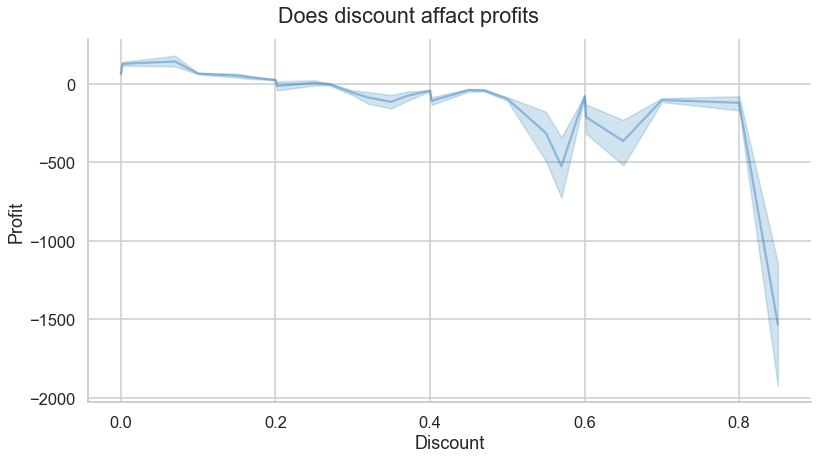

In [36]:
#Does discount affact profits
fig_discount2 = sns.relplot(x='Discount', y='Profit', data=store_df, kind='line', alpha=0.4,
                       height=6.27, aspect=11.7/6.27)
fig_discount2.fig.suptitle('Does discount affact profits', y=1.03)

In [37]:
store_df['Discount'].mean()

0.14290754533047703

### Conclusions of products analysis:

#### Which state and city has the toppest sales?

- States: 
        Quebec makes the toppest sales, Nova Scotia makes the hightest profits.
        The top 5 states by sales are: Quebec, Alberta, Saskatchewan, Ontario, British Columbia. 
        The top 5 states by profits are: Nova Scotia, Alberta, Newfoundland, Quebec, British Columbia.
- Cities:
        Winnipeg makes the toppest sales, St. John's makes the hightest profits.
        The top 5 cities by sales are: Winnipeg, St. John's, Regina, Halifax, Saskatoon. 
        The top 5 cities by profits St. John's, Winnipeg, Dartmouth, Halifax, Regina.



#### Which are the top 5 profit-making products?

- By category, technology products make the biggest revenue and profits.
- By sub-category, binders products make the biggest profits, then storage, art, paper and chairs.
- By segment, consumer products are sold best and make the biggest profits.
- The product which customers bought most is staples."Canon imageCLASS 2200 advanced copier" makes the most profits.


#### What is the average delivery time?Does dilivery time and cost affect total sales?

- There are 4 kinds of ship mode supplied by the company and the average of delivery time is 4 days.
- More people choose fist class, second class or standard class ship mode, it means the dilivery time for most people is 2-6 days, but there is no obvious positive corelation between dilivery time and total sales.
- There is slight positive corelation between dilivery cost and total sales.

#### How is the product sales varying with discounts?

- The average discount of the company is 14.3%.
- When the discount is more than 70%, total sales increase fast.
- When the discount is more than 20%, the company comes to negative profits and when the discount is more than 80%, the profits decrease sharply.

---

### 3. Time Series and cohort analysis

#### Time Series Analysis

- Are profits and revenue increase over time?

- Does customers' purchasing affected by days of week?

- Does seasom affect revenue?

#### Cohort analysis

- Time Cohorts are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the time they started using the company’s products or services. 

- calculate and visualize retention rates

In [38]:
# change the data structure object to datetime
store_df['Order Date'] = pd.to_datetime(store_df['Order Date'], format='%m/%d/%Y')
cleaned_date_df = store_df.set_index('Order Date').sort_index()
store_df.head()

,Row ID,Order ID,Order Date,Ship Date,Number of days,Ship Mode,Customer ID,Customer Name,Segment,City,...,Sales,Quantity,Unit Sales,Discount,Profit,Shipping Cost,Order Priority,Unit shipping cost,Profit_per_unit,unit cost
0,6147.0,MX-2012-134460,2017-05-22,5/26/2017,4.0,Second Class,MC-18100,Mick Crebagga,Consumer,Dartmouth,...,61.380,3.0,20.460,0.0,1.800,0.00,High,0.0,0.600,19.86
1,9596.0,MX-2012-140767,2017-02-18,2/22/2017,4.0,Standard Class,RB-19795,Ross Baird,Home Office,Saskatoon,...,13.440,2.0,6.720,0.0,2.400,0.00,Medium,0.0,1.200,5.52
2,24175.0,IN-2014-57662,2019-08-05,8/10/2019,5.0,Standard Class,DB-13270,Deborah Brumfield,Home Office,Red Deer,...,58.050,5.0,11.610,0.1,19.950,0.01,Medium,0.0,3.990,7.62
3,29002.0,IN-2014-62366,2019-06-19,6/19/2019,0.0,Same Day,KE-16420,Katrina Edelman,Corporate,Kingston,...,65.100,5.0,13.020,0.0,4.500,0.01,Medium,0.0,0.900,12.12
4,46582.0,TU-2014-6730,2019-11-29,11/30/2019,1.0,First Class,KF-6285,Karen Ferguson,Home Office,Red Deer,...,34.128,6.0,5.688,0.6,-49.572,0.02,Medium,0.0,-8.262,13.95


In [39]:
# resample the dataset by month
month_total_df = cleaned_date_df.resample('m').sum()
month_total_df.head()

,Row ID,Number of days,Sales,Quantity,Unit Sales,Discount,Profit,Shipping Cost,Unit shipping cost,Profit_per_unit
Order Date,,,,,,,,,,
2016-01-31,12288294.0,1704.0,98898.48886,1463.0,31118.71312,68.758,8321.80096,10544.82,3570.45,2539.38272
2016-02-29,10956589.0,1562.0,97144.75798,1290.0,29522.54128,53.552,13365.76738,11214.53,3489.86,3508.08838
2016-03-31,15328929.0,2102.0,145729.36736,1836.0,40955.68520,74.212,15303.56826,13096.24,4213.67,4664.07900
2016-04-30,15014091.0,2196.0,116915.76418,2020.0,32338.88334,80.782,12902.32438,12954.59,3584.74,3387.22194
2016-05-31,14909071.0,2221.0,146747.83610,2013.0,42296.56026,82.382,12183.82870,16443.21,4634.54,3763.58466


C:\Users\vivil\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.03, 'Profits and revenue changes over time(by month)')

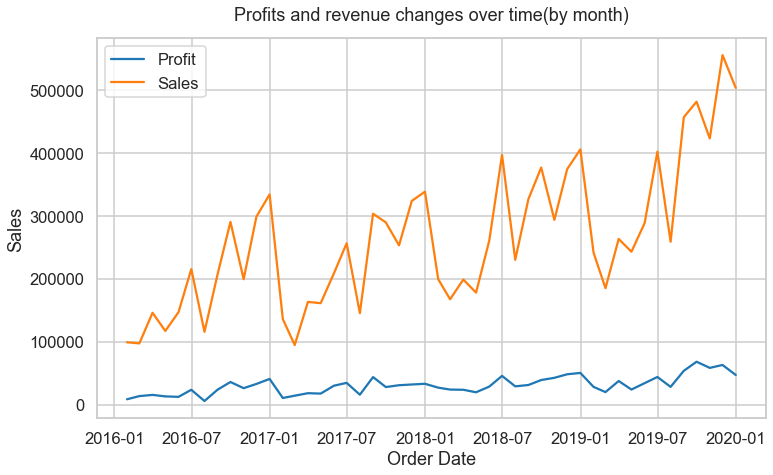

In [40]:
#plot profits and revenue varied by month

month_total_df = month_total_df.reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(x='Order Date', y='Profit', data=month_total_df)
sns.lineplot(x='Order Date', y='Sales', data=month_total_df)
plt.legend(labels = ['Profit', 'Sales'], loc='best')
plt.title('Profits and revenue changes over time(by month)', y=1.03)

In [41]:
import calendar

In [42]:
# extract year, month, weekday from datetime

cleaned_date_df = cleaned_date_df.reset_index()
cleaned_date_df['date'] = pd.to_datetime(cleaned_date_df['Order Date'], errors ='coerce')
cleaned_date_df['year'] = cleaned_date_df["Order Date"].dt.year
cleaned_date_df['month'] = cleaned_date_df["Order Date"].dt.month
cleaned_date_df['day of week'] = cleaned_date_df['Order Date'].dt.weekday_name

cleaned_date_df.head()

,Order Date,Row ID,Order ID,Ship Date,Number of days,Ship Mode,Customer ID,Customer Name,Segment,City,...,Profit,Shipping Cost,Order Priority,Unit shipping cost,Profit_per_unit,unit cost,date,year,month,day of week
0,2016-01-01,11731.0,IT-2011-3647632,1/5/2016,4.0,Second Class,EM-14140,Eugene Moren,Home Office,St. John's,...,-26.055,4.82,High,1.61,-8.685,22.03,2016-01-01,2016,1,Friday
1,2016-01-01,22253.0,IN-2011-47883,1/8/2016,7.0,Standard Class,JH-15985,Joseph Holt,Consumer,Pickering,...,36.036,9.72,Medium,3.24,12.012,24.87,2016-01-01,2016,1,Friday
2,2016-01-01,22255.0,IN-2011-47883,1/8/2016,7.0,Standard Class,JH-15985,Joseph Holt,Consumer,Halifax,...,37.770,4.70,Medium,0.94,7.554,14.24,2016-01-01,2016,1,Friday
3,2016-01-01,42433.0,AG-2011-2040,1/6/2016,5.0,Standard Class,TB-11280,Toby Braunhardt,Consumer,Winnipeg,...,106.140,35.46,Medium,17.73,53.070,133.35,2016-01-01,2016,1,Friday
4,2016-01-01,48883.0,HU-2011-1220,1/5/2016,4.0,Second Class,AT-735,Annie Thurman,Consumer,Halifax,...,29.640,8.17,High,2.04,7.410,7.08,2016-01-01,2016,1,Friday


Text(0.5, 1.03, 'The frequency of customers purchase during days of week')

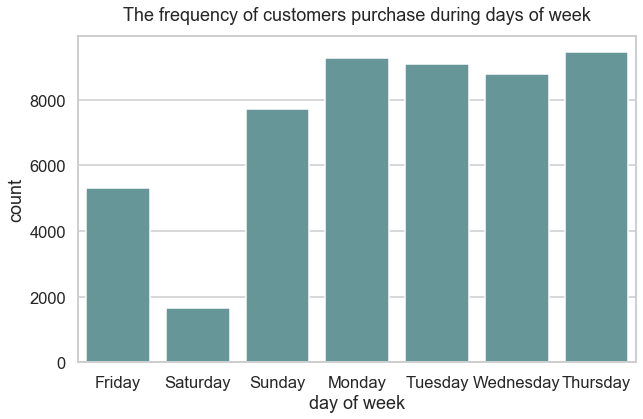

In [43]:
# plot the frequency customers buy in weekday

plt.figure(figsize=(10,6))
fig_week = sns.countplot(x='day of week',data=cleaned_date_df, color='cadetblue')
fig_week.set_title('The frequency of customers purchase during days of week', y=1.03)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

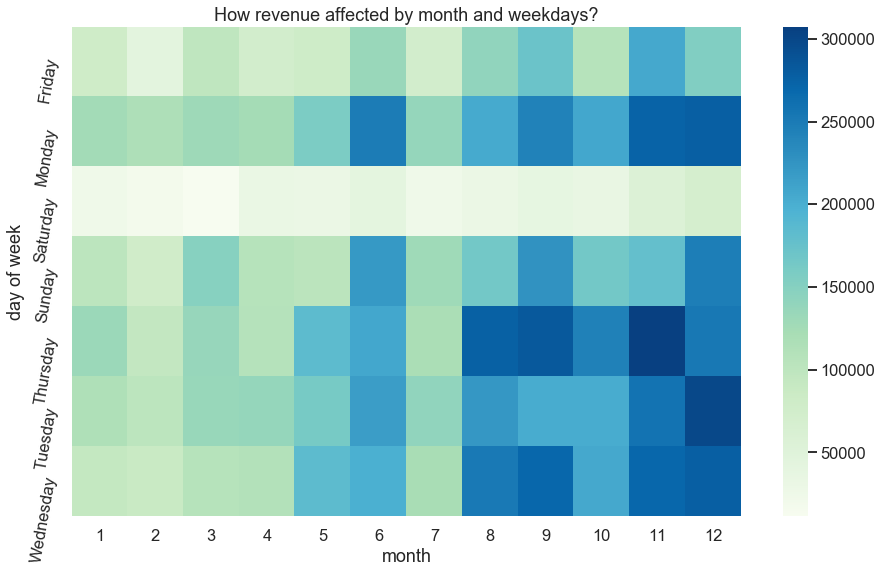

In [44]:
#plot heatmap of how seasons affect revenue

month_week = cleaned_date_df.groupby(['day of week', 'month'], as_index=False).agg({'Sales':'sum'})
month_week_p = month_week.pivot('day of week', 'month', "Sales")

sns.set_context('talk')
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(month_week_p, annot=False,cmap='GnBu')
plt.title('How revenue affected by month and weekdays?', y=1.05)
plt.yticks(rotation=80)

In [45]:
#cohort analysis
#assign acquisition month cohort

import datetime as dt

store_df['Order Date'] = pd.to_datetime(store_df['Order Date'], format='%m/%d/%Y')
store_df = store_df.sort_values('Order Date')

def get_month(x):return dt.datetime(x.year, x.month, 1)

store_df['Order Month'] = store_df['Order Date'].apply(get_month)
grouping = store_df.groupby('Customer ID')['Order Month']
store_df['Cohort Month'] = grouping.transform('min')
store_df.head()

,Row ID,Order ID,Order Date,Ship Date,Number of days,Ship Mode,Customer ID,Customer Name,Segment,City,...,Unit Sales,Discount,Profit,Shipping Cost,Order Priority,Unit shipping cost,Profit_per_unit,unit cost,Order Month,Cohort Month
18590,11731.0,IT-2011-3647632,2016-01-01,1/5/2016,4.0,Second Class,EM-14140,Eugene Moren,Home Office,St. John's,...,14.955,0.5,-26.055,4.82,High,1.61,-8.685,22.03,2016-01-01,2016-01-01
27859,22253.0,IN-2011-47883,2016-01-01,1/8/2016,7.0,Standard Class,JH-15985,Joseph Holt,Consumer,Pickering,...,40.122,0.1,36.036,9.72,Medium,3.24,12.012,24.87,2016-01-01,2016-01-01
12099,22255.0,IN-2011-47883,2016-01-01,1/8/2016,7.0,Standard Class,JH-15985,Joseph Holt,Consumer,Halifax,...,22.734,0.1,37.770,4.70,Medium,0.94,7.554,14.24,2016-01-01,2016-01-01
45415,42433.0,AG-2011-2040,2016-01-01,1/6/2016,5.0,Standard Class,TB-11280,Toby Braunhardt,Consumer,Winnipeg,...,204.150,0.0,106.140,35.46,Medium,17.73,53.070,133.35,2016-01-01,2016-01-01
21721,48883.0,HU-2011-1220,2016-01-01,1/5/2016,4.0,Second Class,AT-735,Annie Thurman,Consumer,Halifax,...,16.530,0.0,29.640,8.17,High,2.04,7.410,7.08,2016-01-01,2016-01-01


In [46]:
''' extract integer values from data, rows represent the first month customers purchase, 
columns represent the number of months since the first transaction'''

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

order_year, order_month, _ = get_date_int(store_df,'Order Month')
cohort_year, cohort_month,_ = get_date_int(store_df, 'Cohort Month')
years_diff = order_year - cohort_year
months_diff = order_month - cohort_month
store_df['Cohort Index'] = years_diff * 12 + months_diff + 1
store_df.head()

,Row ID,Order ID,Order Date,Ship Date,Number of days,Ship Mode,Customer ID,Customer Name,Segment,City,...,Discount,Profit,Shipping Cost,Order Priority,Unit shipping cost,Profit_per_unit,unit cost,Order Month,Cohort Month,Cohort Index
18590,11731.0,IT-2011-3647632,2016-01-01,1/5/2016,4.0,Second Class,EM-14140,Eugene Moren,Home Office,St. John's,...,0.5,-26.055,4.82,High,1.61,-8.685,22.03,2016-01-01,2016-01-01,1
27859,22253.0,IN-2011-47883,2016-01-01,1/8/2016,7.0,Standard Class,JH-15985,Joseph Holt,Consumer,Pickering,...,0.1,36.036,9.72,Medium,3.24,12.012,24.87,2016-01-01,2016-01-01,1
12099,22255.0,IN-2011-47883,2016-01-01,1/8/2016,7.0,Standard Class,JH-15985,Joseph Holt,Consumer,Halifax,...,0.1,37.770,4.70,Medium,0.94,7.554,14.24,2016-01-01,2016-01-01,1
45415,42433.0,AG-2011-2040,2016-01-01,1/6/2016,5.0,Standard Class,TB-11280,Toby Braunhardt,Consumer,Winnipeg,...,0.0,106.140,35.46,Medium,17.73,53.070,133.35,2016-01-01,2016-01-01,1
21721,48883.0,HU-2011-1220,2016-01-01,1/5/2016,4.0,Second Class,AT-735,Annie Thurman,Consumer,Halifax,...,0.0,29.640,8.17,High,2.04,7.410,7.08,2016-01-01,2016-01-01,1


In [47]:
'''count monthly active customers from each cohort,column 1 the number of original customers, 
2-48 the number of them were active in the following months'''

grouping = store_df.groupby(['Cohort Month', 'Cohort Index'])
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='Cohort Month', columns='Cohort Index', values='Customer ID')
cohort_counts.head()

Cohort Index,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Cohort Month,,,,,,,,,,,,,,,,,,,,,
2016-01-01,199.0,31.0,46.0,40.0,45.0,59.0,42.0,60.0,73.0,51.0,...,64.0,71.0,86.0,95.0,61.0,103.0,108.0,99.0,105.0,110.0
2016-02-01,147.0,26.0,27.0,33.0,51.0,25.0,32.0,50.0,32.0,57.0,...,46.0,59.0,81.0,50.0,61.0,75.0,70.0,76.0,81.0,NaN
2016-03-01,170.0,33.0,37.0,43.0,32.0,50.0,56.0,54.0,65.0,60.0,...,79.0,77.0,59.0,77.0,101.0,82.0,89.0,97.0,NaN,NaN
2016-04-01,141.0,27.0,38.0,30.0,25.0,40.0,38.0,39.0,53.0,21.0,...,75.0,34.0,57.0,86.0,61.0,74.0,75.0,NaN,NaN,NaN
2016-05-01,113.0,32.0,15.0,33.0,29.0,33.0,40.0,38.0,21.0,21.0,...,27.0,50.0,57.0,41.0,59.0,48.0,NaN,NaN,NaN,NaN


In [48]:
#calculate retention rate
cohort_sizes = cohort_counts.iloc[:,0] # store the first column as cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3)*100 # percentage

Cohort Index,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Cohort Month,,,,,,,,,,,,,,,,,,,,,
2016-01-01,100.0,15.6,23.1,20.1,22.6,29.6,21.1,30.2,36.7,25.6,...,32.2,35.7,43.2,47.7,30.7,51.8,54.3,49.7,52.8,55.3
2016-02-01,100.0,17.7,18.4,22.4,34.7,17.0,21.8,34.0,21.8,38.8,...,31.3,40.1,55.1,34.0,41.5,51.0,47.6,51.7,55.1,NaN
2016-03-01,100.0,19.4,21.8,25.3,18.8,29.4,32.9,31.8,38.2,35.3,...,46.5,45.3,34.7,45.3,59.4,48.2,52.4,57.1,NaN,NaN
2016-04-01,100.0,19.1,27.0,21.3,17.7,28.4,27.0,27.7,37.6,14.9,...,53.2,24.1,40.4,61.0,43.3,52.5,53.2,NaN,NaN,NaN
2016-05-01,100.0,28.3,13.3,29.2,25.7,29.2,35.4,33.6,18.6,18.6,...,23.9,44.2,50.4,36.3,52.2,42.5,NaN,NaN,NaN,NaN
2016-06-01,100.0,13.9,22.5,26.5,21.9,35.1,31.8,14.6,16.6,19.9,...,41.7,41.1,41.7,50.3,52.3,NaN,NaN,NaN,NaN,NaN
2016-07-01,100.0,39.1,37.5,25.0,29.7,29.7,20.3,12.5,20.3,18.8,...,43.8,40.6,56.2,48.4,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,100.0,25.0,17.3,23.1,24.0,12.5,14.4,12.5,17.3,18.3,...,39.4,43.3,40.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,100.0,14.3,23.8,28.6,10.7,11.9,16.7,13.1,14.3,25.0,...,46.4,42.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.03, 'Retention rates')

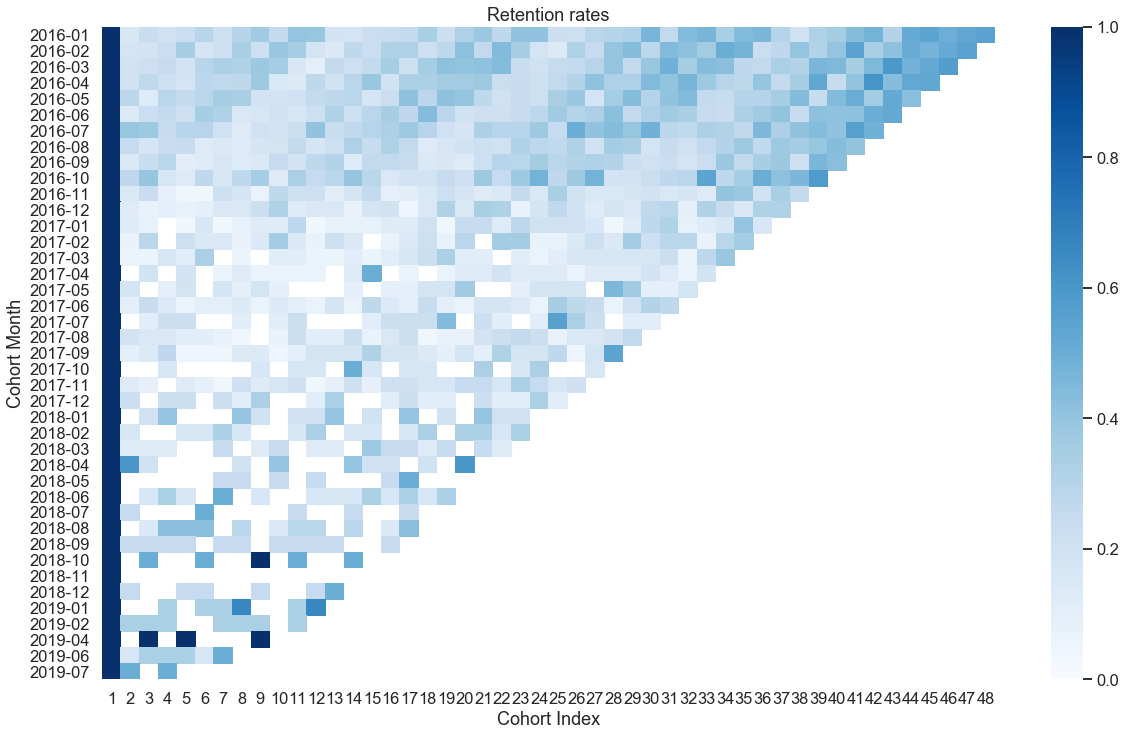

In [49]:
#plot the heatmap
month_list = ['2016-01', '2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
              '2017-01', '2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
              '2018-01', '2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
              '2019-01', '2019-02','2019-04','2019-06','2019-07']
plt.figure(figsize=(20,12))
sns.heatmap(data=retention, annot=False,vmin = 0.0,vmax = 1.0,cmap='Blues', yticklabels=month_list)
plt.title('Retention rates', y=1.03)

### Conclsions of time Series Analysis and cohort analysis:

####  Are profits and revenue increase over time?
 - Profits and revenues are increasing over time, from 2016 to 2019.
 - profits increase not as fast as revenue.

#### Does customers' purchasing affected by days of week?
  - Customers purchase more from Monday to Thursday, they don't like buying from Friday to Sunday, especially on Saturday.

#### Does seasom affect revenue?
  - More purchase occur in June, August, September, October, November and December.
  

#### cohort analysis
 - Customer retention is a very useful metric to understand how many of the all customers are still active.Retention gives the percentage of active customers compared to the total number of customers.
 

 - The heatmap visualization can be used as a standalone representation of company's retention rate, or as an analytical tool to get insights.

### 4. Customer segmentation

#### RFM segmentation

- Behavioral customer segmentation based on 3 metrics: Recency(R), Frequency(F), Monetary Value(M).

- Sort customers based on these metrics.

- Break customers into a pre-defined number of groups 

- Assign a label to each group

#### K-Means segmentation

In order to go to more detail segmentation, I try to run a K-Means analysis.

- skewed varibales.

- Standardize to the same average values.

- Scale to the same standard deviation

- Elbow criterion

- Visualize relative importance of segment attributes

In [50]:
# check the order date range

print('Min:{}; Max:{}'.format(min(store_df['Order Date']), max(store_df['Order Date'])))

Min:2016-01-01 00:00:00; Max:2019-12-31 00:00:00


In [51]:
# aggregate data on a customer level

snapshot_date = max(store_df['Order Date']) + dt.timedelta(days=1)
rmf_df = store_df.groupby(['Customer ID']).agg({'Order Date': lambda x:(snapshot_date - x.max()).days,
                                                 'Order ID': 'count',
                                                 'Sales':'sum'})
# rename columns
rmf_df.rename(columns={'Order Date':'Recency',
                         'Order ID':'Frequency',
                        'Sales':'Monetary Value'},
                      inplace=True)

In [52]:
#recency, frequency and monetary quartile

r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(rmf_df['Recency'], 4, labels=r_labels)

f_labels = range(1, 5)
f_quartiles = pd.qcut(rmf_df['Frequency'], 4, labels=f_labels)

m_labels = range(1, 5)
m_quartiles = pd.qcut(rmf_df['Monetary Value'], 4, labels=m_labels)

# assign quartile labels
rmf_df = rmf_df.assign(R=r_quartiles.values, F=f_quartiles.values, M=m_quartiles.values)


In [53]:
#concatenate RFM quartile values to RFM segment and sum RFM score

def join_rmf(x): return str(x['R']) + str(x['F']) + str(x['M'])
rmf_df['RFM Segment'] = rmf_df.apply(join_rmf, axis=1)
rmf_df['RFM Score'] = rmf_df[['R','F','M']].sum(axis=1)
rmf_df.head()

,Recency,Frequency,Monetary Value,R,F,M,RFM Segment,RFM Score
Customer ID,,,,,,,,
AA-10315,9,42,13747.41300,4,3,4,434,11.0
AA-10375,7,42,5884.19500,4,3,2,432,9.0
AA-10480,126,38,17695.58978,1,3,4,134,8.0
AA-10645,29,73,15343.89070,3,4,4,344,11.0
AA-315,3,8,2243.25600,4,1,2,412,7.0


In [54]:
# largest RFM segments

rmf_df.groupby('RFM Segment').size().sort_values(ascending=False)[:10]

RFM Segment
111    180
444    114
344    103
433    102
122     94
333     90
233     78
211     73
222     70
244     69
dtype: int64

In [55]:
#select bottom RFM segment '111' and view top 5 rows
rmf_df[rmf_df['RFM Segment'] == '111'][:5]

,Recency,Frequency,Monetary Value,R,F,M,RFM Segment,RFM Score
Customer ID,,,,,,,,
AC-450,182,10,1026.597,1,1,1,111,3.0
AF-885,168,6,354.990,1,1,1,111,3.0
AG-390,113,10,473.112,1,1,1,111,3.0
AH-465,242,7,650.826,1,1,1,111,3.0
AI-855,204,10,919.974,1,1,1,111,3.0


In [56]:
# summary metrics per RFM score

rmf_df.groupby('RFM Score').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary Value':['mean','count']
}).round(1)

Recency Frequency Monetary Value      
             mean      mean           mean count
RFM Score                                       
3.0         292.5       7.1          796.2   180
4.0         167.7       9.6         1608.8   162
5.0         140.7      15.1         2548.7   168
6.0          50.9      15.1         2557.3   147
7.0          34.3      20.3         3828.9   102
8.0          39.8      33.3         7314.9   143
9.0          35.5      44.3        11155.7   161
10.0         26.1      50.3        13687.8   235
11.0         17.4      59.0        15933.6   178
12.0          6.7      64.8        18851.0   114

In [57]:
# use RFM score to group customers into Gold, Silver and Bronze segments

def segment_me(df):
    if df['RFM Score'] >= 9:
        return 'Gold'
    elif(df['RFM Score'] >= 5) and (df['RFM Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'

In [58]:
# new segments and their values

rmf_df['General Segment'] = rmf_df.apply(segment_me, axis=1)
rmf_df.groupby('General Segment').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary Value':['mean','count']
}).round(1)

Recency Frequency Monetary Value      
                   mean      mean           mean count
General Segment                                       
Bronze            233.4       8.3         1181.1   342
Gold               22.8      53.6        14531.8   688
Silver             72.0      20.7         4001.2   560

In [59]:
# calculate relative importance of RFM segment attributes
total_avg = rmf_df.iloc[:, 0:3].mean()
cluster_avg_s = rmf_df.groupby('General Segment').mean().iloc[:, 0:3]
prop_rmf = cluster_avg_s / total_avg -1
prop_rmf.round(2)

,Recency,Frequency,Monetary Value
General Segment,,,
Bronze,1.73,-0.74,-0.85
Gold,-0.73,0.66,0.83
Silver,-0.16,-0.36,-0.50


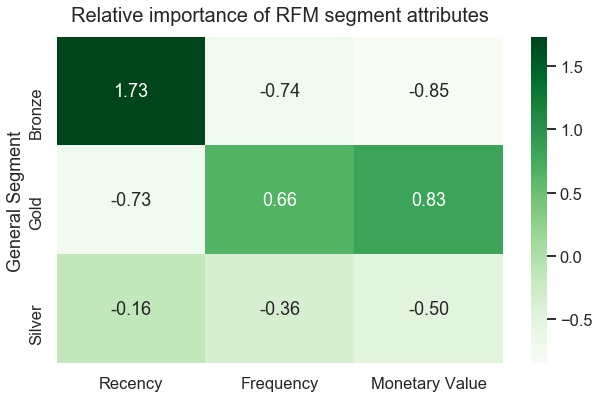

In [60]:
# plot relative importance of RFM segment attributes
plt.figure(figsize=(10,6))
plt.title('Relative importance of RFM segment attributes', y=1.03, fontsize=20)
sns.heatmap(data=prop_rmf, cmap= 'Greens', fmt= '.2f', annot = True)

Text(0.5, 1.03, 'Distribution of new segments')

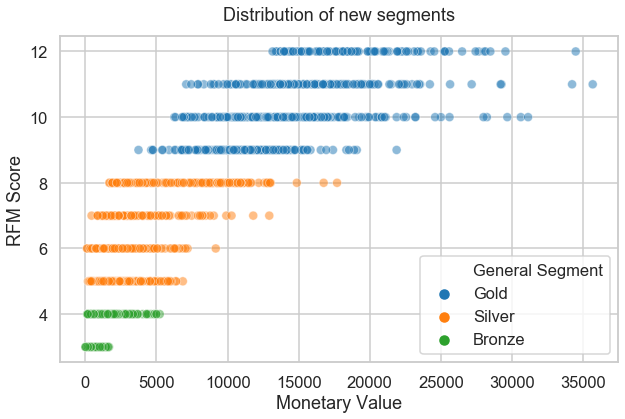

In [61]:
# plot new segments
plt.figure(figsize=(10,6))
sns.scatterplot(x='Monetary Value', y='RFM Score', data=rmf_df, hue='General Segment', alpha=0.5)
plt.title('Distribution of new segments', y=1.03)

In [62]:
# K-Means analysis
rmf_k = rmf_df[['Recency', 'Frequency', 'Monetary Value']]
rmf_k.describe()

,Recency,Frequency,Monetary Value
count,1590.000000,1590.000000,1590.000000
mean,85.431447,32.257862,7951.259063
std,127.736114,21.910515,6936.570172
min,1.000000,1.000000,7.173000
25%,15.000000,12.000000,1674.812250
50%,36.000000,28.000000,6248.135590
75%,100.000000,52.000000,13133.098420
max,1206.000000,97.000000,35668.120800


In [63]:
# Removing outliers from Amount
Q1 = 1674.81
Q3 = 13133.01
IQR = Q3 - Q1
rmf_k = rmf_k[(rmf_k['Monetary Value'] >= Q1 - 1.5*IQR) & (rmf_k['Monetary Value'] <= Q3 + 1.5*IQR)]

# Removing outliers from Frequency
Q1 = 12
Q3 = 52
IQR = Q3 - Q1
rmf_k = rmf_k[(rmf_k.Frequency >= Q1 - 1.5*IQR) & (rmf_k.Frequency <= Q3 + 1.5*IQR)]

# Removing outliers from Recency
Q1 = 15
Q3 = 100
IQR = Q3 - Q1
rmf_k = rmf_k[(rmf_k.Recency >= Q1 - 1.5*IQR) & (rmf_k.Recency <= Q3 + 1.5*IQR)]

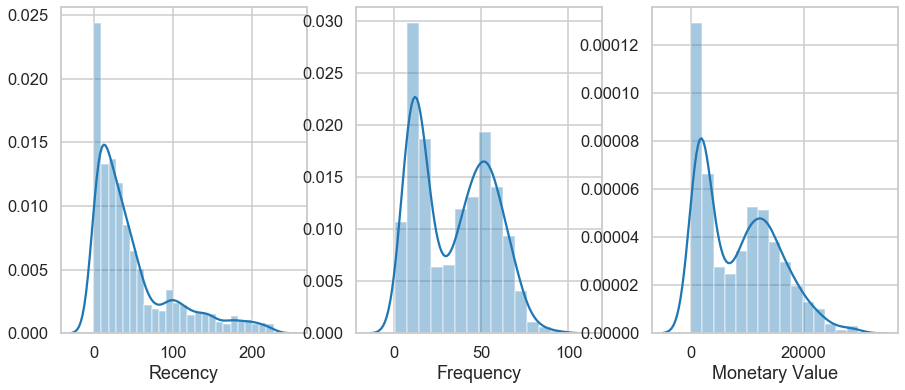

In [64]:
# exploring distribution of recency, frequency and monetary values

fig,(ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
sns.distplot(rmf_k['Recency'], ax=ax0)
sns.distplot(rmf_k['Frequency'], ax=ax1)
sns.distplot(rmf_k['Monetary Value'], ax=ax2)

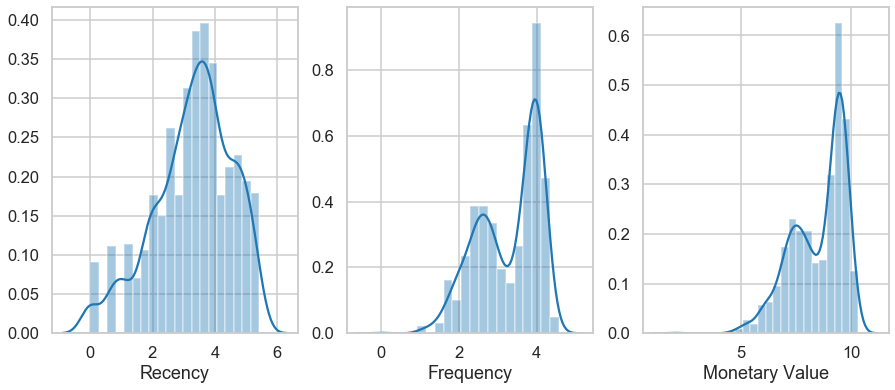

In [65]:
# logarithmic transformation

rmf_log = rmf_k[['Frequency','Recency','Monetary Value']].apply(np.log, axis=1).round(3)

fig,(ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
sns.distplot(rmf_log['Recency'], ax=ax0)
sns.distplot(rmf_log['Frequency'], ax=ax1)
sns.distplot(rmf_log['Monetary Value'], ax=ax2)

In [66]:
# centering varibales with different means by substracing average value from each observation

rmf_centered = rmf_k - rmf_k.mean()
rmf_centered.describe().round(2)

,Recency,Frequency,Monetary Value
count,1423.00,1423.00,1423.00
mean,0.00,-0.00,-0.00
std,51.53,21.54,6813.38
min,-48.84,-33.73,-8565.59
25%,-36.84,-20.73,-6645.99
50%,-18.84,1.27,-220.04
75%,14.16,18.27,5030.90
max,177.16,62.27,21091.47


In [67]:
# scaling variables by dividing them by standard deviation of each

rmf_scaled = rmf_k / rmf_k.std()
rmf_scaled.describe().round(2)

,Recency,Frequency,Monetary Value
count,1423.00,1423.00,1423.00
mean,0.97,1.61,1.26
std,1.00,1.00,1.00
min,0.02,0.05,0.00
25%,0.25,0.65,0.28
50%,0.60,1.67,1.23
75%,1.24,2.46,2.00
max,4.41,4.50,4.35


In [68]:
# combing centering and scaling by using a scaler from scikit learn

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rmf_k)
rmf_normalized = scaler.transform(rmf_k)
print('mean:', rmf_normalized.mean(axis=0).round(2))
print('std:', rmf_normalized.std(axis=0).round(2))


mean: [-0.  0. -0.]
std: [1. 1. 1.]


In [69]:
# sequence, put them together
rmf_log = np.log(rmf_k)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rmf_log)

rmf_normalized = scaler.transform(rmf_log)

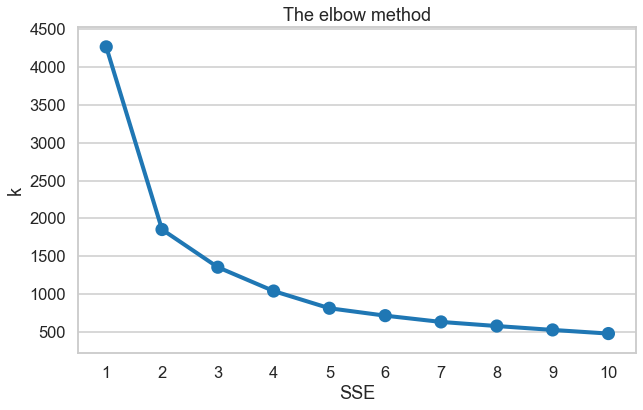

In [70]:
# how to choose cluster: visual--elbow criterion Plot the number of clusters against within-cluster sum-of-squared-errors (SSE) - sum of squared distances from every data point to their cluster center
#Identify an "elbow" in the plot
#Elbow - a point representing an "optimal" number of clusters

from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rmf_normalized)
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(10,6))
plt.title('The elbow method')
plt.xlabel('SSE')
plt.ylabel('k')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

In [71]:
#run kmeans We choose k=4
model = KMeans(n_clusters=4,random_state=1)
model.fit(rmf_normalized)
cluster_labels = model.predict(rmf_normalized)

In [72]:
#create a cluster column in the original dataframe

rmf_df_k = rmf_k.assign(KCluster = cluster_labels)
rmf_df_k.head()

,Recency,Frequency,Monetary Value,KCluster
Customer ID,,,,
AA-10315,9,42,13747.41300,0
AA-10375,7,42,5884.19500,0
AA-10480,126,38,17695.58978,2
AA-10645,29,73,15343.89070,2
AA-315,3,8,2243.25600,1


In [73]:
#calculate average RFM values and size for each cluster

rmf_df_k.groupby(['KCluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary Value': ['mean', 'count'],
}).round(0)

Recency Frequency Monetary Value      
            mean      mean           mean count
KCluster                                       
0            5.0      53.0        14269.0   244
1           17.0      15.0         2513.0   211
2           40.0      50.0        13227.0   563
3          107.0      12.0         1828.0   405

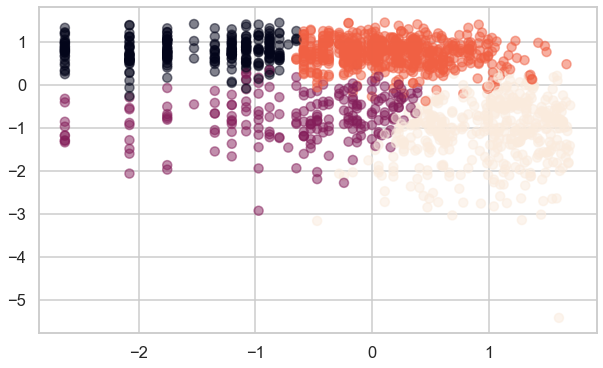

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(rmf_normalized[:,0], rmf_normalized[:,2], c=cluster_labels, alpha=0.5)

In [75]:
#assign kmean segment name 

def segment_k(df):
    if df['KCluster'] == 0:
        return 'Active'
    elif df['KCluster'] == 1:
        return 'Lapsed'
    elif df['KCluster'] == 2:
        return 'Inactive'
    else:
        return 'Churned'
    
rmf_df_k['Kmean Segment'] = rmf_df_k.apply(segment_k, axis=1)
rmf_df_k.head()


,Recency,Frequency,Monetary Value,KCluster,Kmean Segment
Customer ID,,,,,
AA-10315,9,42,13747.41300,0,Active
AA-10375,7,42,5884.19500,0,Active
AA-10480,126,38,17695.58978,2,Inactive
AA-10645,29,73,15343.89070,2,Inactive
AA-315,3,8,2243.25600,1,Lapsed


In [76]:
# calculate relative importance of segment attributes

cluster_avg = rmf_df_k.groupby(['Kmean Segment']).mean()
population_avg = rmf_k.mean()
relative = (cluster_avg / population_avg -1).round(2)
relative = relative[['Frequency', 'Recency','Monetary Value']]
relative

,Frequency,Recency,Monetary Value
Kmean Segment,,,
Active,0.54,-0.89,0.66
Churned,-0.66,1.15,-0.79
Inactive,0.45,-0.19,0.54
Lapsed,-0.57,-0.66,-0.71


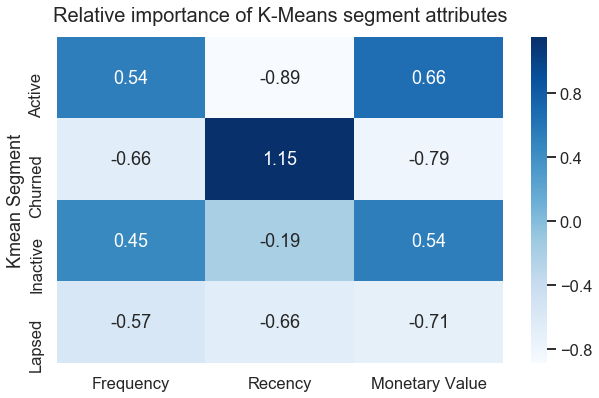

In [77]:
# plot a heatmap of relative importance 

plt.figure(figsize=(10,6))
plt.title('Relative importance of K-Means segment attributes', y=1.03, fontsize=20)
sns.heatmap(data=relative, annot=True, fmt='.2f', cmap='Blues')

### Conclusions of customer segmentation:

##### RFM segmentation

- Assign customers new segments based on the calculate of RFM scores: Gold, Silver, Bronze.

- Gold: they are the best customers,lowest recency and highest frequency and monetary value.
- Silver: they are in the medium.
- Bronze: their performances are not so good, highest recency and lowest frequency and monetary value.


##### K-Means segmentation

- Assign customers new segments based on the calculate of RFM scores: Active, Lapsed, Inactive,Churned.

- Active:they are the best customers,lowest recency and highest frequency and monetary value.
- Lapsed:their performances are better.
- Inactive:they are in the medium.
- Churned:their performances are not so good, highest recency and lowest frequency and monetary value.
